# Assignment 1
Student Name: Nima Jahanbazfard

## Insurance Dataset

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score



### Reading dataset

In [2]:
df = pd.read_csv('insurance.csv')
                 
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'insurance.csv'

In [20]:
df.describe().T.style.bar(subset=['mean'], color="#4e4151").background_gradient(subset=['std', '50%', 'max'])

,count,mean,std,min,25%,50%,75%,max
age,1338.000000,39.207025,14.049960,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1338.000000,30.663397,6.098187,15.960000,26.296250,30.400000,34.693750,53.130000
children,1338.000000,1.094918,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1338.000000,13270.422265,12110.011237,1121.873900,4740.287150,9382.033000,16639.912515,63770.428010


### Plots

C:\Users\nima8\AppData\Local\Temp\ipykernel_9764\2380028939.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], color='#a02933')


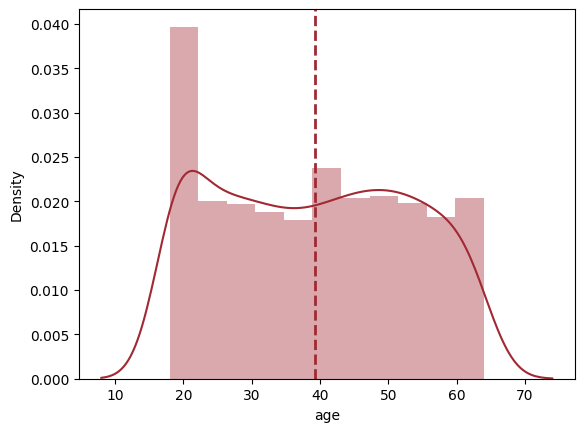

In [21]:
sns.distplot(df['age'], color='#a02933')
plt.axvline(x=df['age'].mean(), color='#a02933', linestyle='--', linewidth=2)
plt.show()

C:\Users\nima8\AppData\Local\Temp\ipykernel_9764\985966485.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


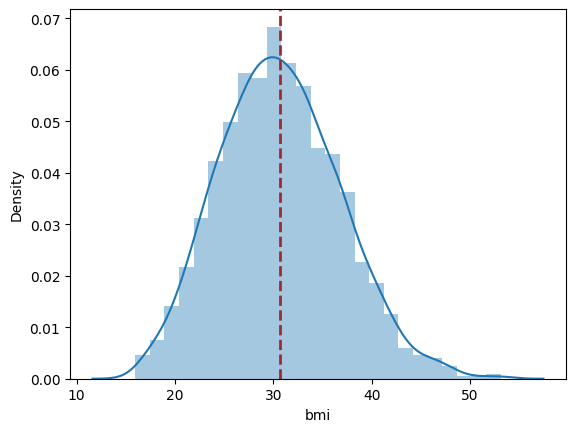

In [22]:
sns.distplot(df['bmi'])
plt.axvline(x=df['bmi'].mean(), color='#a02933', linestyle='--', linewidth=2)
plt.show()

C:\Users\nima8\AppData\Local\Temp\ipykernel_9764\1803521871.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


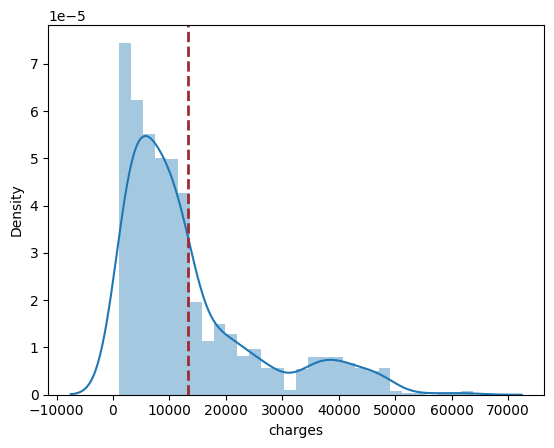

In [23]:
sns.distplot(df['charges'])
plt.axvline(x=df['charges'].mean(), color='#a02933', linestyle='--', linewidth=2)
plt.show()

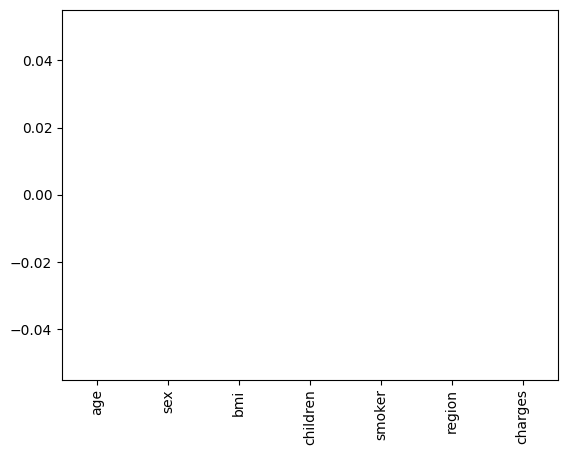

In [24]:
missing = df.isnull().sum()
missing = missing[missing >= 0]
missing = missing.sort_values(ascending=False)
missing.plot.bar(color='#a02933')
plt.show()

In [26]:
for cl in df.columns:
    if df[cl].dtype == object:
        df = pd.get_dummies(df, prefix=cl , columns=[cl] , dtype=int)

df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


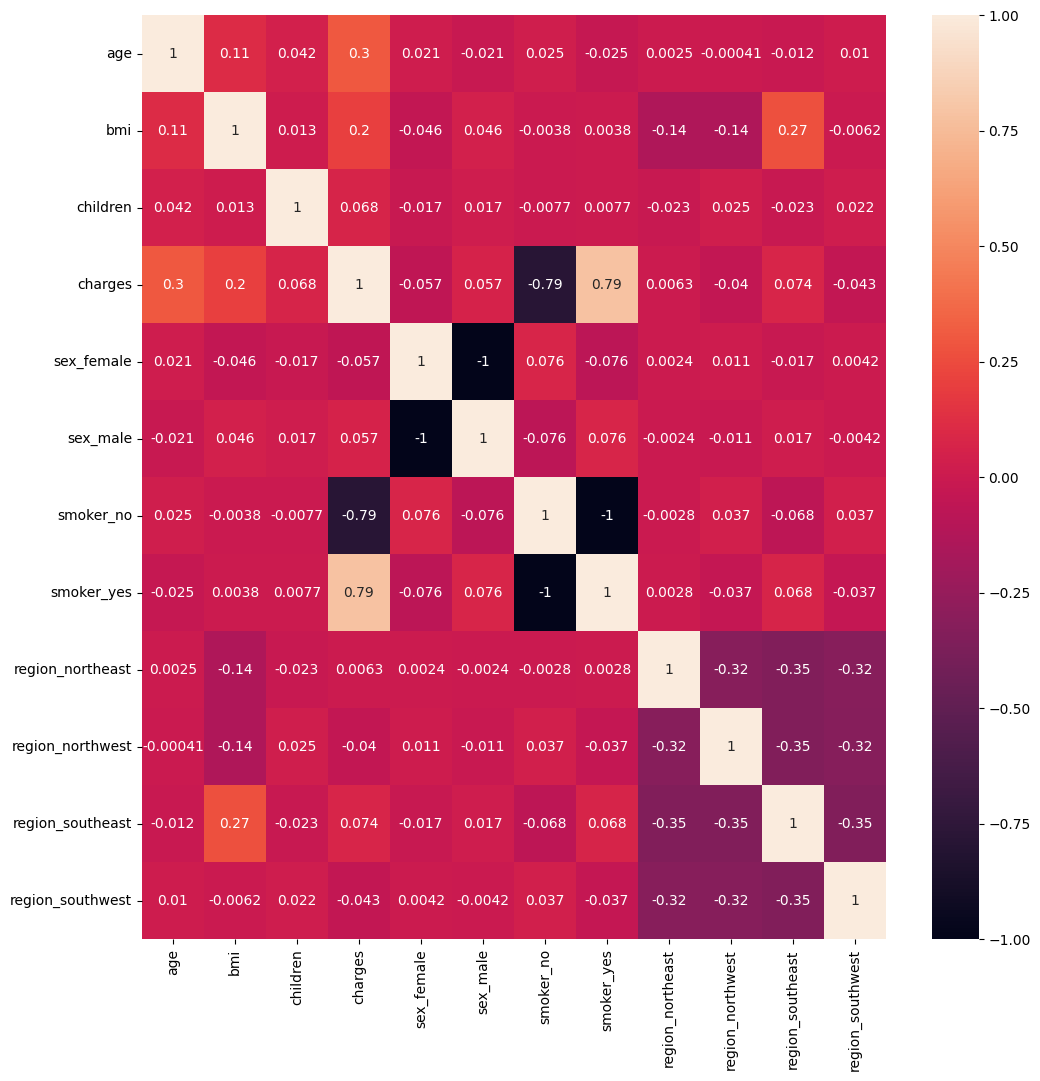

In [27]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Moving charges column


In [28]:
column_to_move = 'charges'
target_position = 12  

# Get the list of columns
columns = list(df.columns)

# Remove the column from its current position
columns.remove(column_to_move)

# Insert the column at the target position
columns.insert(target_position, column_to_move)

# Reorder the DataFrame columns
df = df[columns]

df

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,1,0,0,1,0,0,0,1,16884.92400
1,18,33.770,1,0,1,1,0,0,0,1,0,1725.55230
2,28,33.000,3,0,1,1,0,0,0,1,0,4449.46200
3,33,22.705,0,0,1,1,0,0,1,0,0,21984.47061
4,32,28.880,0,0,1,1,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0,10600.54830
1334,18,31.920,0,1,0,1,0,1,0,0,0,2205.98080
1335,18,36.850,0,1,0,1,0,0,0,1,0,1629.83350
1336,21,25.800,0,1,0,1,0,0,0,0,1,2007.94500


### Linear regression

In [29]:
scaler = MinMaxScaler()
scaler.fit(df)
df = scaler.transform(df)

In [30]:
df

array([[0.02173913, 0.3212268 , 0.        , ..., 0.        , 1.        ,
        0.25161076],
       [0.        , 0.47914985, 0.2       , ..., 1.        , 0.        ,
        0.00963595],
       [0.2173913 , 0.45843422, 0.6       , ..., 1.        , 0.        ,
        0.05311516],
       ...,
       [0.        , 0.56201238, 0.        , ..., 1.        , 0.        ,
        0.00810808],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 1.        ,
        0.01414352],
       [0.93478261, 0.35270379, 0.        , ..., 0.        , 0.        ,
        0.44724873]])

In [31]:
Y = df[:, -1]
X = df[:, :11]

In [32]:
X

array([[0.02173913, 0.3212268 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.47914985, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.2173913 , 0.45843422, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.35270379, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [33]:
Y

array([0.25161076, 0.00963595, 0.05311516, ..., 0.00810808, 0.01414352,
       0.44724873])

In [34]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
# model instance
model = LinearRegression()
# Training model
model.fit(train_x, train_y)


LinearRegression()

In [37]:
# Get model's predictions
predicted_test = model.predict(test_x)
predicted_train = model.predict(train_x)
rmse_test = np.sqrt(mean_squared_error(test_y, predicted_test))
rmse_train = np.sqrt(mean_squared_error(train_y, predicted_train))


In [38]:
rmse_test

0.09275806241380403

In [39]:
rmse_train

0.09748772932015316

## Diabetes Dataset


### Imports

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import plotly.express as px

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

### Reading dataset

In [3]:
df = pd.read_csv('diabetes.csv')
                 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("flare", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### plots

In [7]:
px.histogram(data_frame= df, x='Outcome', color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [20]:
px.histogram(data_frame=df,x=df.Age,color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [21]:
px.histogram(data_frame=df,x=df.DiabetesPedigreeFunction,color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [22]:
px.histogram(data_frame=df,x=df.Pregnancies,color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [23]:
px.histogram(data_frame=df,x=df.Glucose,color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [24]:
px.histogram(data_frame=df,x=df.BloodPressure,color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [25]:
px.histogram(data_frame=df,x=df.SkinThickness ,color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [26]:
px.histogram(data_frame=df,x=df.Insulin,color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [27]:
px.histogram(data_frame=df,x=df.BMI,color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [28]:
px.scatter(data_frame=df,x='BMI',color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [29]:
px.scatter(data_frame=df,x='Insulin',color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [30]:
px.scatter(data_frame=df,x='SkinThickness',color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [31]:
px.scatter(data_frame=df,x='Age',color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [32]:
px.scatter(data_frame=df,x='BloodPressure',color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [33]:
px.scatter(data_frame=df,x='Glucose',color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [34]:
px.scatter(data_frame=df,x='Pregnancies',color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

In [35]:
px.scatter(data_frame=df,x='DiabetesPedigreeFunction',color='Outcome',color_discrete_sequence=['#ff3399','#3399ff'])

### preprocessing

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


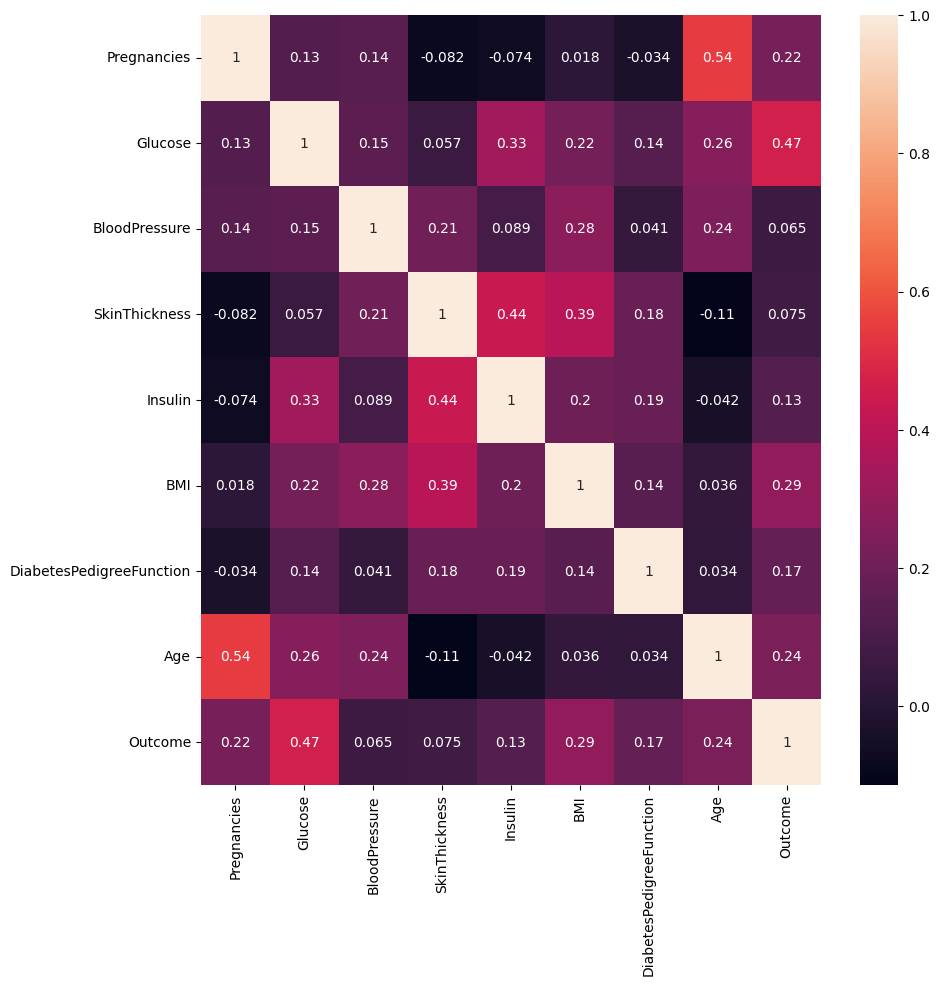

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### model function

In [25]:
df=np.array(df)
x=df[:,:8]
y=df[:,-1]

In [26]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [27]:
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [28]:
x.shape

(768, 8)

In [29]:
y.shape

(768,)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

scaler.transform(X_train) #transform training data

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

In [31]:
scaler.transform(X_test) #transform validation data

array([[ 0.68185612, -0.71402038, -0.61712658, ...,  0.26073561,
        -0.11637247,  0.87809089],
       [-0.52639686, -0.27664283,  0.30191569, ...,  0.48053518,
        -0.954231  , -1.03594038],
       [-0.52639686, -0.40160784, -0.29275872, ..., -0.15300476,
        -0.9245197 , -1.03594038],
       ...,
       [ 1.28598261, -0.80774414,  0.13973176, ...,  0.62275843,
         0.04703966,  2.0961108 ],
       [-0.52639686,  0.78555979,  0.03160914, ..., -0.51502758,
        -0.39268751, -0.33992901],
       [ 1.28598261, -1.46381046,  0.03160914, ...,  0.42881763,
         0.70068816,  0.53008521]])

In [32]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test):
    '''
    Keyword arguments:
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics
    '''
    
    model.fit(X_train, y_train)  #fit the model instance 


    predictions = model.predict(X_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

In [33]:
lg = LogisticRegression()

results = train_evaluate_model(lg, X_train, y_train, X_test, y_test)

c:\Users\T460s\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Dicision Tree

In [34]:
decision_tree = DecisionTreeClassifier() 
decision_tree_results = train_evaluate_model(decision_tree,X_train, y_train, X_test, y_test)
decision_tree_results.index = ['DecisionTree']


In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("flare", as_cmap=True))

### K Nearest Neighbors

In [50]:
KNN = KNeighborsClassifier(n_neighbors=12)

In [51]:
knn = train_evaluate_model(KNN, X_train, y_train, X_test, y_test)
knn.index =['KNearsNeighbors']
results = pd.concat([results, knn])


ValueError: pos_label=1 is not a valid label. It should be one of [-1.0, -0.0]

In [52]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("flare", as_cmap=True))

NameError: name 'results' is not defined

### Random Forest

In [53]:
rfc = RandomForestClassifier()

In [54]:
rfc_result = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)
rfc_result.index = ['RandomForest']

results = pd.concat([results, rfc_result])


ValueError: pos_label=1 is not a valid label. It should be one of [-1.0, -0.0]

In [55]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("flare", as_cmap=True))

NameError: name 'results' is not defined